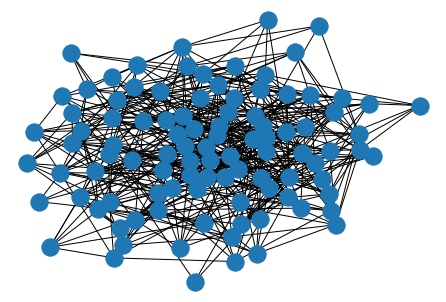

In [234]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import random as rn
import time


# G = nx.star_graph(100)
graph_nodes_c = 100

G = nx.erdos_renyi_graph(graph_nodes_c, 0.1)

pos = nx.spring_layout(G, scale=1)

nx.draw(G, pos)
plt.show()

In [235]:
print("Number of nodes: {}".format(len(G.nodes)))
print("Number of edges: {}".format(len(G.edges)))

# nx.circular_layout(G.nodes)

Number of nodes: 100
Number of edges: 515


In [236]:
# make json data

json_g = {"elements":{"nodes":[], "edges":[]}}

n_pos = pos

# print(n_pos)

scale = 1500

for n in G.nodes:
          
    node = {"data" : {                                                                     
                        "id" : str(n),                                                               
                        "station_name" : "station {}".format(n),                                                 
                        "y" : n_pos[n][0] * scale,                                                            
                        "x" : n_pos[n][1] * scale                                                             
            },
            "position":{
                "y" : n_pos[n][0] * scale,                                                            
                "x" : n_pos[n][1] * scale                                                             
            },
            "selected" : False
           }
    json_g["elements"]["nodes"].append(node)

for e in G.edges:
    # print(e)
    edge = {"data" : {                                                                     
                        "id" : "{}_{}".format(e[0], e[1]),                                                               
                        "source": str(e[0]),
                        "target": str(e[1]),
                        "line_name": "{}_{}".format(e[0], e[1]),
                        "company_type": rn.randint(0,3)
            },
            "selected" : False
           }
    json_g["elements"]["edges"].append(edge)
    
    
# print(json.dumps(json_g))
    




In [237]:
# save to file 

with open("../graphviewer/data/railways.json", "w+") as f:
    f.write(json.dumps(json_g))

In [238]:
# push new graph to data
import requests

playload = json.dumps({"op":"load_data", "data": json_g})

# save req to file 

with open("./data.d", "w+") as f:
    f.write(playload)

tb = time.time()

r = requests.post("http://192.168.50.10:8083/api/v1/pathq", headers={"Content-type":"application/json"}, data=playload)

print("{}/ elapsed {}".format(r, time.time()-tb))

<Response [200]>/ elapsed 0.015961170196533203


In [239]:
# generate path requests and data
x_g = []
y_g = []
for i in range(1000):
    print(i)
    x_g.append(i)
    playload = json.dumps( {"op":"get_shortest", "data": {"source": str(rn.randint(0,graph_nodes_c-1)), "target": str(rn.randint(0,graph_nodes_c-1))}})
    
    tb = time.time()
    r = requests.post("http://192.168.50.10:8083/api/v1/pathq", headers={"Content-type":"application/json"}, data=playload)
    te = time.time()-tb
    print("path: {} / elapsed {}".format(r.text, te))
    y_g.append(te)
    


0
path: {"path": ["76", "42", "79"]}
 / elapsed 0.009266376495361328
1
path: {"path": ["95", "8", "6"]}
 / elapsed 0.008548974990844727
2
path: {"path": ["59", "6", "86"]}
 / elapsed 0.005878925323486328
3
path: {"path": ["69", "59", "72"]}
 / elapsed 0.006524324417114258
4
path: {"path": ["98", "40"]}
 / elapsed 0.007691860198974609
5
path: {"path": ["83", "10", "43", "15"]}
 / elapsed 0.005918741226196289
6
path: {"path": ["70", "65", "82"]}
 / elapsed 0.0074465274810791016
7
path: {"path": ["96", "88", "56"]}
 / elapsed 0.006460905075073242
8
path: {"path": ["78", "88", "56"]}
 / elapsed 0.006894826889038086
9
path: {"path": ["89", "0", "37", "51"]}
 / elapsed 0.0059833526611328125
10
path: {"path": ["5", "7", "2"]}
 / elapsed 0.005878925323486328
11
path: {"path": ["55", "9", "21"]}
 / elapsed 0.007739067077636719
12
path: {"path": ["13", "8", "42"]}
 / elapsed 0.005675315856933594
13
path: {"path": ["46", "9", "89"]}
 / elapsed 0.006850004196166992
14
path: {"path": ["20", "67", "

path: {"path": ["10", "46", "1"]}
 / elapsed 0.0076062679290771484
138
path: {"path": ["68", "18", "7", "60"]}
 / elapsed 0.009096384048461914
139
path: {"path": ["68", "21"]}
 / elapsed 0.006774187088012695
140
path: {"path": ["59", "61", "43"]}
 / elapsed 0.009855031967163086
141
path: {"path": ["21", "43", "4"]}
 / elapsed 0.007935762405395508
142
path: {"path": ["2", "30", "10", "50"]}
 / elapsed 0.006649494171142578
143
path: {"path": ["89", "62", "43"]}
 / elapsed 0.009250164031982422
144
path: {"path": ["87", "3", "54"]}
 / elapsed 0.009310245513916016
145
path: {"path": ["62", "82"]}
 / elapsed 0.00571894645690918
146
path: {"path": ["67", "59", "16"]}
 / elapsed 0.006715297698974609
147
path: {"path": ["73", "2", "19"]}
 / elapsed 0.00561833381652832
148
path: {"path": ["72", "58", "43", "56"]}
 / elapsed 0.0065653324127197266
149
path: {"path": ["14", "3"]}
 / elapsed 0.005940914154052734
150
path: {"path": ["0", "32", "48"]}
 / elapsed 0.005584716796875
151
path: {"path": ["

path: {"path": ["5", "7", "16"]}
 / elapsed 0.005316734313964844
259
path: {"path": ["26", "9", "97"]}
 / elapsed 0.008587837219238281
260
path: {"path": ["4", "70", "57"]}
 / elapsed 0.008082151412963867
261
path: {"path": ["31"]}
 / elapsed 0.008381366729736328
262
path: {"path": ["89", "53", "67"]}
 / elapsed 0.0074291229248046875
263
path: {"path": ["50", "10", "8", "7"]}
 / elapsed 0.006713151931762695
264
path: {"path": ["35", "16", "95"]}
 / elapsed 0.006670475006103516
265
path: {"path": ["8", "6", "59", "94"]}
 / elapsed 0.007597446441650391
266
path: {"path": ["4", "1", "33", "92"]}
 / elapsed 0.00877833366394043
267
path: {"path": ["17", "8", "36"]}
 / elapsed 0.006802558898925781
268
path: {"path": ["19", "2", "43", "54"]}
 / elapsed 0.006661653518676758
269
path: {"path": ["81", "54", "62"]}
 / elapsed 0.006490945816040039
270
path: {"path": ["2", "7", "13", "81"]}
 / elapsed 0.006325244903564453
271
path: {"path": ["18", "24", "32"]}
 / elapsed 0.006356239318847656
272
pa

path: {"path": ["26", "9", "86", "6"]}
 / elapsed 0.014283895492553711
376
path: {"path": ["33", "1", "85", "39"]}
 / elapsed 0.010655403137207031
377
path: {"path": ["47", "6", "42"]}
 / elapsed 0.012258529663085938
378
path: {"path": ["76", "31", "66", "72"]}
 / elapsed 0.006601572036743164
379
path: {"path": ["67", "3", "14", "97"]}
 / elapsed 0.012588262557983398
380
path: {"path": ["39", "40", "57"]}
 / elapsed 0.010025501251220703
381
path: {"path": ["97", "1"]}
 / elapsed 0.007090568542480469
382
path: {"path": ["98", "6", "47", "55"]}
 / elapsed 0.01254129409790039
383
path: {"path": ["11", "16", "73"]}
 / elapsed 0.006877422332763672
384
path: {"path": ["77", "73", "66", "72"]}
 / elapsed 0.010274410247802734
385
path: {"path": ["77", "27", "71", "4"]}
 / elapsed 0.008350133895874023
386
path: {"path": ["77", "27", "31", "26"]}
 / elapsed 0.009854316711425781
387
path: {"path": ["64", "21", "31"]}
 / elapsed 0.011231184005737305
388
path: {"path": ["86", "23", "84"]}
 / elapse

path: {"path": ["6", "8", "17"]}
 / elapsed 0.006757259368896484
495
path: {"path": ["61", "34"]}
 / elapsed 0.007024049758911133
496
path: {"path": ["65", "6", "25"]}
 / elapsed 0.006661653518676758
497
path: {"path": ["74", "22"]}
 / elapsed 0.009776115417480469
498
path: {"path": ["36", "92", "59"]}
 / elapsed 0.006368160247802734
499
path: {"path": ["8", "24", "45"]}
 / elapsed 0.006330251693725586
500
path: {"path": ["56", "43", "4"]}
 / elapsed 0.01574540138244629
501
path: {"path": ["90", "0", "55"]}
 / elapsed 0.007176876068115234
502
path: {"path": ["7", "76", "46"]}
 / elapsed 0.0061719417572021484
503
path: {"path": ["90", "0", "37"]}
 / elapsed 0.005656719207763672
504
path: {"path": ["38", "98", "15"]}
 / elapsed 0.007052898406982422
505
path: {"path": ["81", "13"]}
 / elapsed 0.00611114501953125
506
path: {"path": ["40", "34", "61"]}
 / elapsed 0.007159709930419922
507
path: {"path": ["56", "18", "1", "33"]}
 / elapsed 0.00630497932434082
508
path: {"path": ["25", "66"]}


path: {"path": ["3", "10", "30", "77"]}
 / elapsed 0.009959697723388672
619
path: {"path": ["26", "61", "80"]}
 / elapsed 0.00986480712890625
620
path: {"path": ["97", "1", "18", "24"]}
 / elapsed 0.01029062271118164
621
path: {"path": ["68", "30"]}
 / elapsed 0.009527206420898438
622
path: {"path": ["39", "25", "6"]}
 / elapsed 0.008961200714111328
623
path: {"path": ["3", "10", "29", "80"]}
 / elapsed 0.011279106140136719
624
path: {"path": ["63", "66", "54"]}
 / elapsed 0.011113643646240234
625
path: {"path": ["2", "43", "58"]}
 / elapsed 0.00764775276184082
626
path: {"path": ["51", "46", "64"]}
 / elapsed 0.008245468139648438
627
path: {"path": ["23", "10", "30", "77"]}
 / elapsed 0.008268117904663086
628
path: {"path": ["61", "5", "67", "44"]}
 / elapsed 0.006928443908691406
629
path: {"path": ["84", "71", "27", "0"]}
 / elapsed 0.006961822509765625
630
path: {"path": ["53", "67"]}
 / elapsed 0.005853891372680664
631
path: {"path": ["85"]}
 / elapsed 0.005946159362792969
632
path

path: {"path": ["23", "42", "48"]}
 / elapsed 0.005719423294067383
740
path: {"path": ["59", "61", "27"]}
 / elapsed 0.008366107940673828
741
path: {"path": ["88", "53", "11", "16"]}
 / elapsed 0.009381771087646484
742
path: {"path": ["12", "54", "39"]}
 / elapsed 0.006373882293701172
743
path: {"path": ["25", "6", "59", "94"]}
 / elapsed 0.006365060806274414
744
path: {"path": ["31", "21", "52"]}
 / elapsed 0.006531953811645508
745
path: {"path": ["16", "11"]}
 / elapsed 0.005746603012084961
746
path: {"path": ["86", "6", "98"]}
 / elapsed 0.006781578063964844
747
path: {"path": ["21", "95", "34"]}
 / elapsed 0.007286787033081055
748
path: {"path": ["34", "3", "81", "63"]}
 / elapsed 0.007425785064697266
749
path: {"path": ["37", "12", "17"]}
 / elapsed 0.01351022720336914
750
path: {"path": ["31", "88", "53"]}
 / elapsed 0.011789798736572266
751
path: {"path": ["41", "1", "37"]}
 / elapsed 0.008771896362304688
752
path: {"path": ["1", "18", "24"]}
 / elapsed 0.009004831314086914
753


path: {"path": ["17", "12", "37", "94"]}
 / elapsed 0.011563301086425781
866
path: {"path": ["18", "59", "78"]}
 / elapsed 0.015127182006835938
867
path: {"path": ["97", "1", "15", "47"]}
 / elapsed 0.013214826583862305
868
path: {"path": ["39", "0", "32", "73"]}
 / elapsed 0.011331558227539062
869
path: {"path": ["35", "23", "78", "25"]}
 / elapsed 0.011869192123413086
870
path: {"path": ["51", "44", "73"]}
 / elapsed 0.008012533187866211
871
path: {"path": ["99", "14", "85"]}
 / elapsed 0.009952306747436523
872
path: {"path": ["53", "36"]}
 / elapsed 0.012075424194335938
873
path: {"path": ["61", "26", "31"]}
 / elapsed 0.007164478302001953
874
path: {"path": ["43", "10", "23", "53"]}
 / elapsed 0.009996891021728516
875
path: {"path": ["65", "57", "18", "56"]}
 / elapsed 0.01389312744140625
876
path: {"path": ["53", "18", "1", "4"]}
 / elapsed 0.012603044509887695
877
path: {"path": ["20", "24", "18"]}
 / elapsed 0.006970405578613281
878
path: {"path": ["60", "39", "40"]}
 / elapsed 

path: {"path": ["27", "0"]}
 / elapsed 0.030805587768554688
990
path: {"path": ["11", "16", "64", "27"]}
 / elapsed 0.028274059295654297
991
path: {"path": ["59", "72"]}
 / elapsed 0.03730416297912598
992
path: {"path": ["45", "39", "62"]}
 / elapsed 0.03342723846435547
993
path: {"path": ["82", "3", "81", "1"]}
 / elapsed 0.027869701385498047
994
path: {"path": ["4", "1", "33"]}
 / elapsed 0.02363419532775879
995
path: {"path": ["56", "18", "53", "89"]}
 / elapsed 0.01852726936340332
996
path: {"path": ["60", "45", "66"]}
 / elapsed 0.021800518035888672
997
path: {"path": ["47", "6", "8", "79"]}
 / elapsed 0.027223587036132812
998
path: {"path": ["88", "78"]}
 / elapsed 0.01618194580078125
999
path: {"path": ["34", "61", "26"]}
 / elapsed 0.016980886459350586


max: 0.1913433074951172
avg: 0.009390443563461304


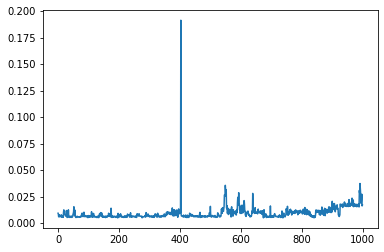

In [240]:
# response time

print("max: {}".format(max(y_g)))
print("avg: {}".format(sum(y_g)/len(y_g)))

plt.plot(x_g, y_g)
plt.show()